## Compare Score/Bias: HMMER vs MMseqs vs MMore

## PROFMARK dataset
### Profile-to-Sequence 

In [12]:
# imports
from __future__ import print_function
import sys
import os
import psutil
import math
import numpy as np
import pandas as pd
import cv2 as cv
from PIL import Image
from IPython.display import display
from matplotlib import cm as cmap
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import statsmodels.api as sm
import statistics as stats

In [13]:
# number or rows/columns to display
pd.options.display.max_rows = 40
pd.options.display.max_columns = 20

# resolution of output
matplotlib.rcParams['figure.dpi'] = 300

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 6 }

matplotlib.rc('font', **font)

In [14]:
# root directory
path_to_db = "data/profmark/"

In [15]:
# index filepaths
target_index_fname = "{}/pmark.hmm.idx".format(path_to_db)
query_index_fname = "{}/pmark.fa.idx".format(path_to_db)

In [16]:
fnames = []

# options
my_kscores  = ["k75", "k80", "k95"]
my_alphas   = ["12", "16"]
my_betas    = ["24", "32", "40"]
my_evals    = ["e1000"]
my_biascorr = ["bias", "nobias"]
my_id       = ["001", "003"]

In [17]:
# hmmer
hmmer = {}
hmmer["fname"] = "{}/hmmer.profmark.p2s.003.tf".format(path_to_db)

In [18]:
# mmseqs
mmseqs = {}
mmseqs["id"] = "003"
mmseqs["K"] = ["k75", "k80", "k95"]

my_id = mmseqs["id"]
for K in mmseqs["K"]:
    fname = "{}/mmseqs.profmark.p2s.{}.{}.tf".format(path_to_db, K, my_id)
    mmseqs[K] = {}
    mmseqs[K]["fname"] = fname
    
    fnames.append(fname)
pass


In [19]:
# mmore (with bias)
mmore = {}
mmore["id"] = "026"
mmore["K"]  = ["k75", "k80", "k95"]
mmore["A"]  = ["8"]
mmore["B"]  = ["12"]
mmore["E"]  = ["e1000"]

my_id = mmore["id"]
for K in mmore["K"]:
    mmore[K] = {}
    for A in mmore["A"]:
        mmore[K][A] = {}
        for B in mmore["B"]:
            mmore[K][A][B] = {}
            for E in mmore["E"]:
                mmore[K][A][B][E] = {}
    
                fname = "{}/mmore.profmark.p2s.{}.{}.{}.{}.{}.tf".format(path_to_db, K, A, B, E, my_id)
                mmore[K][A][B][E]["fname"] = fname
                fnames.append(fname)
            pass
        pass
    pass
pass

In [20]:
# mmore (full fwdback)
mmore_full = {}
mmore_full["id"] = "006"
mmore_full["K"]  = ["k75", "k80", "k95"]
mmore_full["E"]  = ["e1000"]

my_id = mmore_full["id"]
for K in mmore_full["K"]:
    mmore_full[K] = {}
    for E in mmore_full["E"]:
        mmore_full[K][E] = {}

        fname = "{}/mmore.profmark.p2s.{}.full.{}.{}.tf".format(path_to_db, K, E, my_id)
        mmore_full[K][E]["fname"] = fname
        fnames.append(fname)
    pass
pass

In [21]:
# mmore (with no bias)
mmore_nobias = {}
mmore_nobias["id"] = "024"
mmore_nobias["K"]  = ["k75", "k80", "k95"]
mmore_nobias["A"]  = ["8"]
mmore_nobias["B"]  = ["12"]
mmore_nobias["E"]  = ["e1000"]

my_id = mmore_nobias["id"]
for K in mmore_nobias["K"]:
    mmore_nobias[K] = {}
    for A in mmore_nobias["A"]:
        mmore_nobias[K][A] = {}
        for B in mmore_nobias["B"]:
            mmore_nobias[K][A][B] = {}
            for E in mmore_nobias["E"]:
                mmore_nobias[K][A][B][E] = {}
    
                fname = "{}/mmore.profmark.p2s.{}.{}.{}.{}.{}.tf".format(path_to_db, K, A, B, E, my_id)
                mmore_nobias[K][A][B][E]["fname"] = fname
                fnames.append(fname)
            pass
        pass
    pass
pass

In [22]:
# mmore (by domain with bias)
mmore_bydom = {}
mmore_bydom["id"] = "027"
mmore_bydom["K"]  = ["k75", "k80", "k95"]
mmore_bydom["A"]  = ["8"]
mmore_bydom["B"]  = ["12"]
mmore_bydom["E"]  = ["e1000"]

my_id = mmore_bydom["id"]
for K in mmore_bydom["K"]:
    mmore_bydom[K] = {}
    for A in mmore_bydom["A"]:
        mmore_bydom[K][A] = {}
        for B in mmore_bydom["B"]:
            mmore_bydom[K][A][B] = {}
            for E in mmore_bydom["E"]:
                mmore_bydom[K][A][B][E] = {}
    
                fname = "{}/mmore.profmark.p2s.{}.{}.{}.{}.{}.tf".format(path_to_db, K, A, B, E, my_id)
                mmore_bydom[K][A][B][E]["fname"] = fname
                fnames.append(fname)
            pass
        pass
    pass
pass

In [23]:
fnames

['data/profmark//mmseqs.profmark.p2s.k75.003.tf',
 'data/profmark//mmseqs.profmark.p2s.k80.003.tf',
 'data/profmark//mmseqs.profmark.p2s.k95.003.tf',
 'data/profmark//mmore.profmark.p2s.k75.8.12.e1000.026.tf',
 'data/profmark//mmore.profmark.p2s.k80.8.12.e1000.026.tf',
 'data/profmark//mmore.profmark.p2s.k95.8.12.e1000.026.tf',
 'data/profmark//mmore.profmark.p2s.k75.full.e1000.006.tf',
 'data/profmark//mmore.profmark.p2s.k80.full.e1000.006.tf',
 'data/profmark//mmore.profmark.p2s.k95.full.e1000.006.tf',
 'data/profmark//mmore.profmark.p2s.k75.8.12.e1000.024.tf',
 'data/profmark//mmore.profmark.p2s.k80.8.12.e1000.024.tf',
 'data/profmark//mmore.profmark.p2s.k95.8.12.e1000.024.tf',
 'data/profmark//mmore.profmark.p2s.k75.8.12.e1000.027.tf',
 'data/profmark//mmore.profmark.p2s.k80.8.12.e1000.027.tf',
 'data/profmark//mmore.profmark.p2s.k95.8.12.e1000.027.tf']

In [24]:
# Total Queries and Targets
total_target       =    211547
total_query        =      2141
total_target_real  =     11547 
total_target_decoy =    200000
# Total True Positives and Negatives
total_res = 452922127
total_TP  =     11547
total_TN  = 428200000
unknown   =  24710580
TP_to_TN  =  2.70e-05

# load data

In [25]:
datas = []

# set header format
tf_dformat = {
    "target_name": "str",
    "query_name": "str",
    "eval": "float",
    "truth": "str",
    "tot_T": "int",
    "tot_F": "int",
    "tot_?": "int"
}
tf_header = tf_dformat.keys()

# load data
usecols = [0,1,2,3,4,5]
skiprows = None
sep = " "
names = tf_header

In [26]:
# hmmer
hmmer["data"]  = pd.read_csv( hmmer["fname"], sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False )
hmmer["color"] = "black"
hmmer["label"] = "hmmer"
datas.append(hmmer["data"])

In [27]:
# mmseqs
my_kcolors = ["pink", "red", "maroon"]

for i,K in enumerate(mmseqs["K"]):
    data = pd.read_csv( mmseqs[K]["fname"], sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
    mmseqs[K]["data"] = data
    mmseqs[K]["color"] = my_kcolors[i] 
    mmseqs[K]["label"] = "mmseqs-{}".format(K)
    datas.append(mmseqs[K]["data"])
pass

In [28]:
# mmore (with bias)
for K in mmore["K"]:
    for A in mmore["A"]:
        for B in mmore["B"]:
            for E in mmore["E"]:
                data = pd.read_csv( mmore[K][A][B][E]["fname"], sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
                mmore[K][A][B][E]["data"] = data
                mmore[K][A][B][E]["label"] = "mmore-{}-{}-{}-{}".format(K, A, B, E)
                datas.append( mmore[K][A][B][E]["data"] )
            pass
        pass
    pass
pass

In [29]:
# mmore (with no bias)
for K in mmore_nobias["K"]:
    for A in mmore_nobias["A"]:
        for B in mmore_nobias["B"]:
            for E in mmore_nobias["E"]:
                data = pd.read_csv( mmore_nobias[K][A][B][E]["fname"], sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
                mmore_nobias[K][A][B][E]["data"] = data
                mmore_nobias[K][A][B][E]["label"] = "mmore-nobias-{}-{}-{}-{}".format(K, A, B, E)
                datas.append( mmore_nobias[K][A][B][E]["data"] )
            pass
        pass
    pass
pass

In [30]:
# mmore (with no bias)
for K in mmore_bydom["K"]:
    for A in mmore_bydom["A"]:
        for B in mmore_bydom["B"]:
            for E in mmore_bydom["E"]:
                data = pd.read_csv( mmore_bydom[K][A][B][E]["fname"], sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
                mmore_bydom[K][A][B][E]["data"] = data
                mmore_bydom[K][A][B][E]["label"] = "mmore-bydom-{}-{}-{}-{}".format(K, A, B, E)
                datas.append( mmore_bydom[K][A][B][E]["data"] )
            pass
        pass
    pass
pass

In [31]:
# mmore (full fwdbck)
for K in mmore_full["K"]:
    for E in mmore_full["E"]:
        data = pd.read_csv( mmore_full[K][E]["fname"], sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
        mmore_full[K][E]["data"] = data
        mmore_full[K][E]["label"] = "mmore-full-{}-{}".format(K, E)
        datas.append( mmore_full[K][E]["data"] )
    pass
pass

In [32]:
for data in datas:
    data["roc_y"] = data["tot_T"].astype("float32") / float(total_TP)
    data["roc_x"] = data["tot_F"].astype("float32") / float(total_query)   

In [33]:
data

,target_name,query_name,eval,truth,tot_T,tot_F,roc_y,roc_x
0,2-Hacid_dh,2-Hacid_dh/0/891-1174/2306-2624,0.0,T,1,0,0.000087,0.000000
1,2-Hacid_dh,2-Hacid_dh/1/103-396/407-730,0.0,T,2,0,0.000173,0.000000
2,2-Hacid_dh,2-Hacid_dh/2/35-364/383-701,0.0,T,3,0,0.000260,0.000000
3,2-Hacid_dh,2-Hacid_dh/3/186-500/578-900,0.0,T,4,0,0.000346,0.000000
4,2-Hacid_dh,2-Hacid_dh/4/323-605/612-933,0.0,T,5,0,0.000433,0.000000
...,...,...,...,...,...,...,...,...
65774,YycH,DUF3533/3511/3163-3602/5058-5414,210000.0,?,6360,54407,0.550792,25.411957
65775,Zona_pellucida,decoy138930,210000.0,F,6360,54408,0.550792,25.412424
65776,Zona_pellucida,decoy92849,210000.0,F,6360,54409,0.550792,25.412891
65777,Zot,decoy65536,210000.0,F,6360,54410,0.550792,25.413358


In [34]:
# set colors
hmmer["color"] = "black"

mmseqs["k95"]["color"] = "pink"
mmseqs["k80"]["color"] = "red"
mmseqs["k75"]["color"] = "maroon"

yticks = [(x*0.1) for x in range(0,11,1)]
colors = ["red", "orange", "yellow", "green", "blue", "purple" ]

my_kscores = ["k75", "k80", "k95"]

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


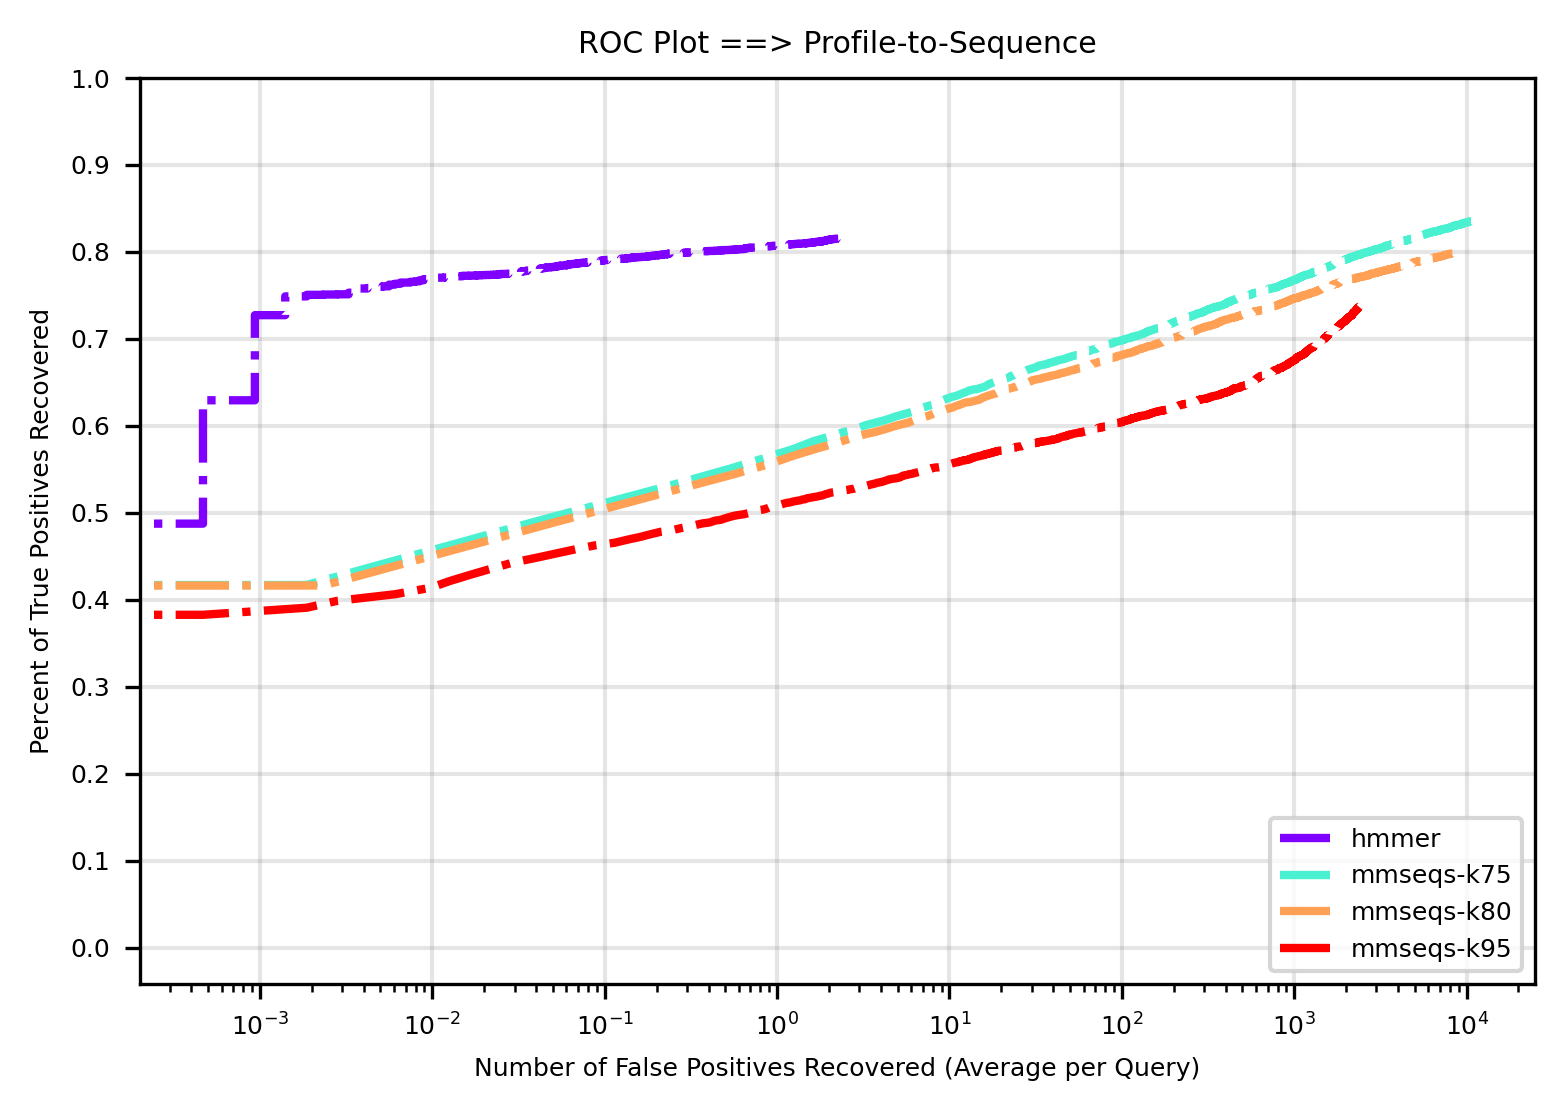

In [35]:
my_data   = []
my_colors = []
my_labels = []

my_data.append( hmmer["data"] )
my_colors.append( hmmer["color"] )
my_labels.append( hmmer["label"] )

for K in mmseqs["K"]:
    my_data.append( mmseqs[K]["data"] )
    my_colors.append( mmseqs[K]["color"] )
    my_labels.append( mmseqs[K]["label"] )

for x in range(len(my_data)):
    my_colors[x] = cmap.rainbow(x*100)
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=my_colors[x], label=my_labels[x], linestyle="-.", linewidth=2, marker=None )

plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
plt.yticks(yticks)

plt.title('ROC Plot ==> Profile-to-Sequence')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.svg")
plt.show()

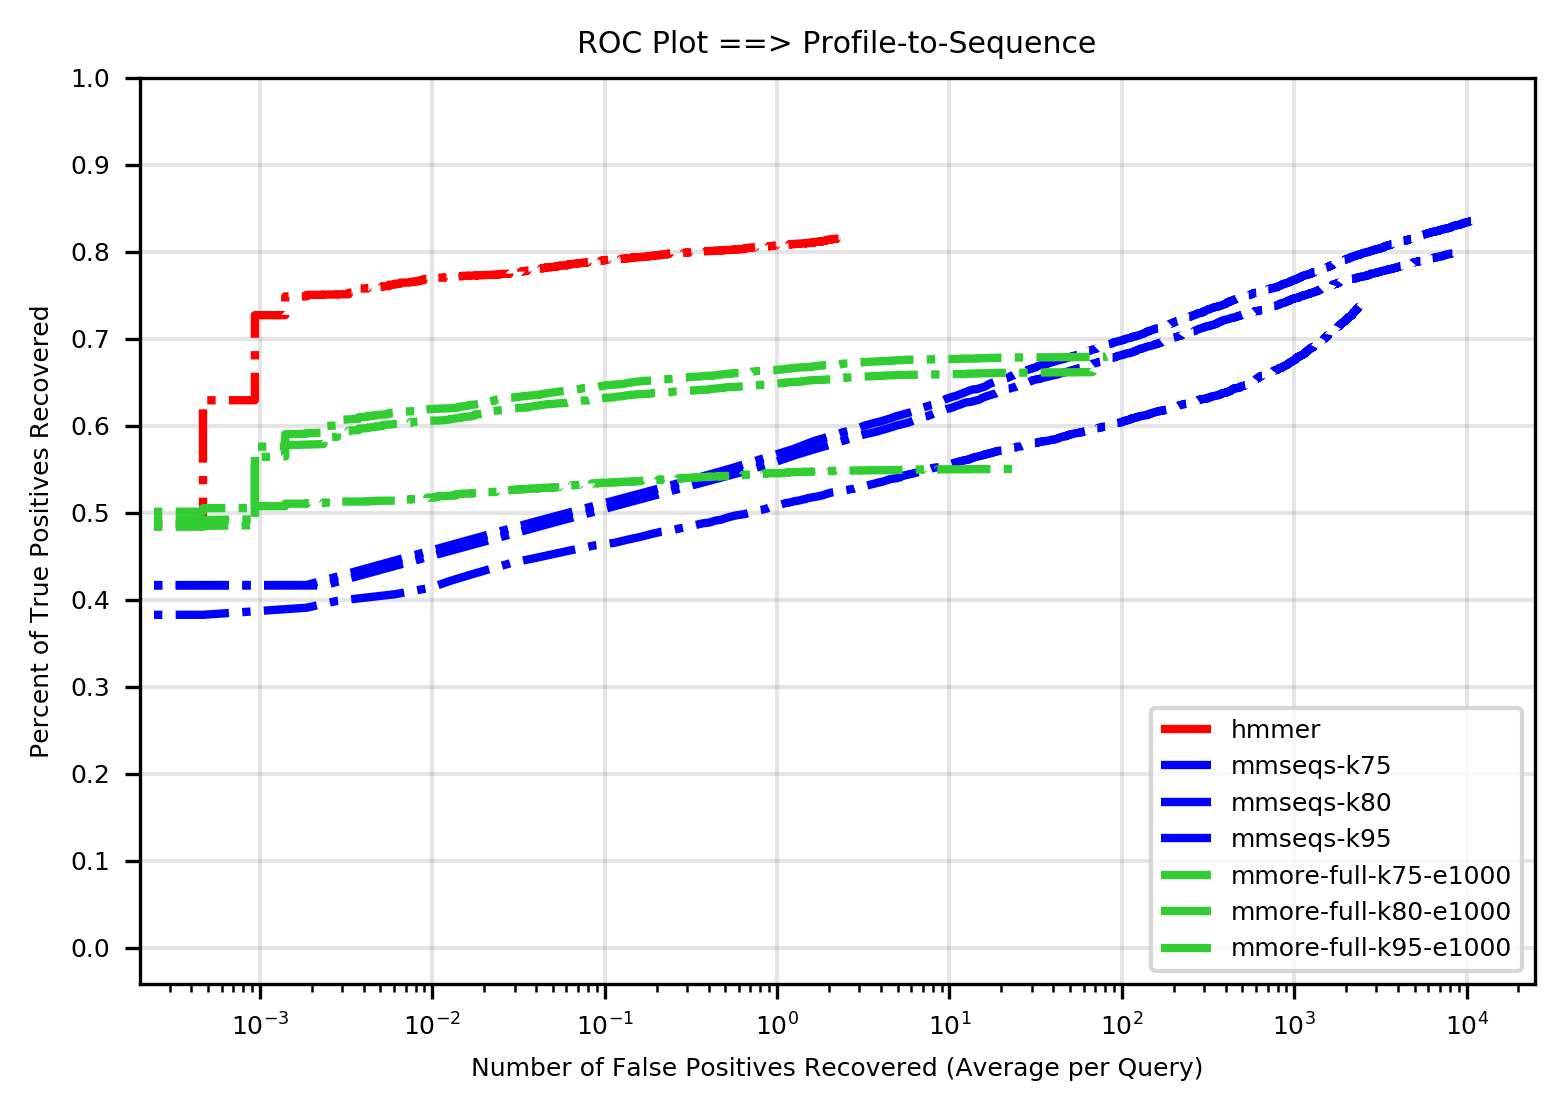

In [87]:
my_data   = []
my_colors = []
my_labels = []

my_data.append( hmmer["data"] )
my_colors.append( "red" )
my_labels.append( hmmer["label"] )

colors = {}
for K in my_kscores:
    my_data.append( mmseqs[K]["data"] )
    my_colors.append( "blue" )
    my_labels.append( mmseqs[K]["label"] )
    
for K in my_kscores:
    E = "e1000"
    my_data.append( mmore_full[K][E]["data"] )
    my_colors.append( "limegreen" )
    my_labels.append( mmore_full[K][E]["label"] )

for x in range(len(my_data)):
#     my_colors[x] = cmap.rainbow(x*100)
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=my_colors[x], label=my_labels[x], linestyle="-.", linewidth=2, marker=None )

plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
plt.yticks(yticks)

plt.title('ROC Plot ==> Profile-to-Sequence')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.svg")
plt.show()

In [88]:
mmseqs.keys()

dict_keys(['id', 'K', 'k75', 'k80', 'k95'])

In [89]:
my_data   = []
my_colors = []
my_labels = []

my_data.append( hmmer["data"] )
my_colors.append( "red" )
my_labels.append( hmmer["label"] )

colors = {}
for K in my_kscores:
    my_data.append( mmseqs[K]["data"] )
    my_colors.append( "blue" )
    my_labels.append( mmseqs[K]["label"] )
    
for K in my_kscores:
    E = "e1000"
    my_data.append( mmore_bydom[K][E]["data"] )
    my_colors.append( "limegreen" )
    my_labels.append( mmore_bydom[K][E]["label"] )

for x in range(len(my_data)):
#     my_colors[x] = cmap.rainbow(x*100)
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=my_colors[x], label=my_labels[x], linestyle="--", linewidth=1, marker=None )

plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
plt.yticks(yticks)
plt.xlim((10e-5, 10e0))

plt.title('ROC Plot ==> Profile-to-Sequence')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.svg")
plt.show()

KeyError: 'e1000'

In [79]:
my_data = []
my_colors = []
my_labels = []

i = 0
K = my_kscores[i]
A = my_alphas[0]
B = my_betas[0]
E = my_evals[0]

my_data.append( hmmer["data"] )
my_colors.append( "red" )
my_labels.append( hmmer["label"] )
    
my_data.append( mmseqs[K]["data"] )
my_colors.append( "blue" )
my_labels.append( mmseqs[K]["label"] )

my_data.append( mmore_full[K][E]["data"] )
my_colors.append( "limegreen" )
my_labels.append( mmore_full[K][E]["label"] )

for Ai in mmore["A"]:
    for Bi in mmore["B"]:
        my_data.append( mmore[K][Ai][Bi][E]["data"] )
        my_colors.append( "purple" )
        my_labels.append( mmore[K][Ai][Bi][E]["label"] )

for Ai in mmore["A"]:
    for Bi in mmore["B"]:
        my_data.append( mmore_nobias[K][Ai][Bi][E]["data"] )
        my_colors.append( "darkorange" )
        my_labels.append( mmore_nobias[K][Ai][Bi][E]["label"] )

for Ai in mmore["A"]:
    for Bi in mmore["B"]:
        my_data.append( mmore_bydom[K][Ai][Bi][E]["data"] )
        my_colors.append( "teal" )
        my_labels.append( mmore_bydom[K][Ai][Bi][E]["label"] )

for x in range(len(my_data)):
#     my_colors[x] = cmap.rainbow(x*100)
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=my_colors[x], label=my_labels[x], linestyle="-", linewidth=1.2, marker=None, alpha=0.7 )

plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
plt.yticks(yticks)
plt.xlim((10e-5, 10e0))

plt.title('ROC Plot ==> Profile-to-Sequence')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot-k75.svg")
plt.show()

KeyError: '75'

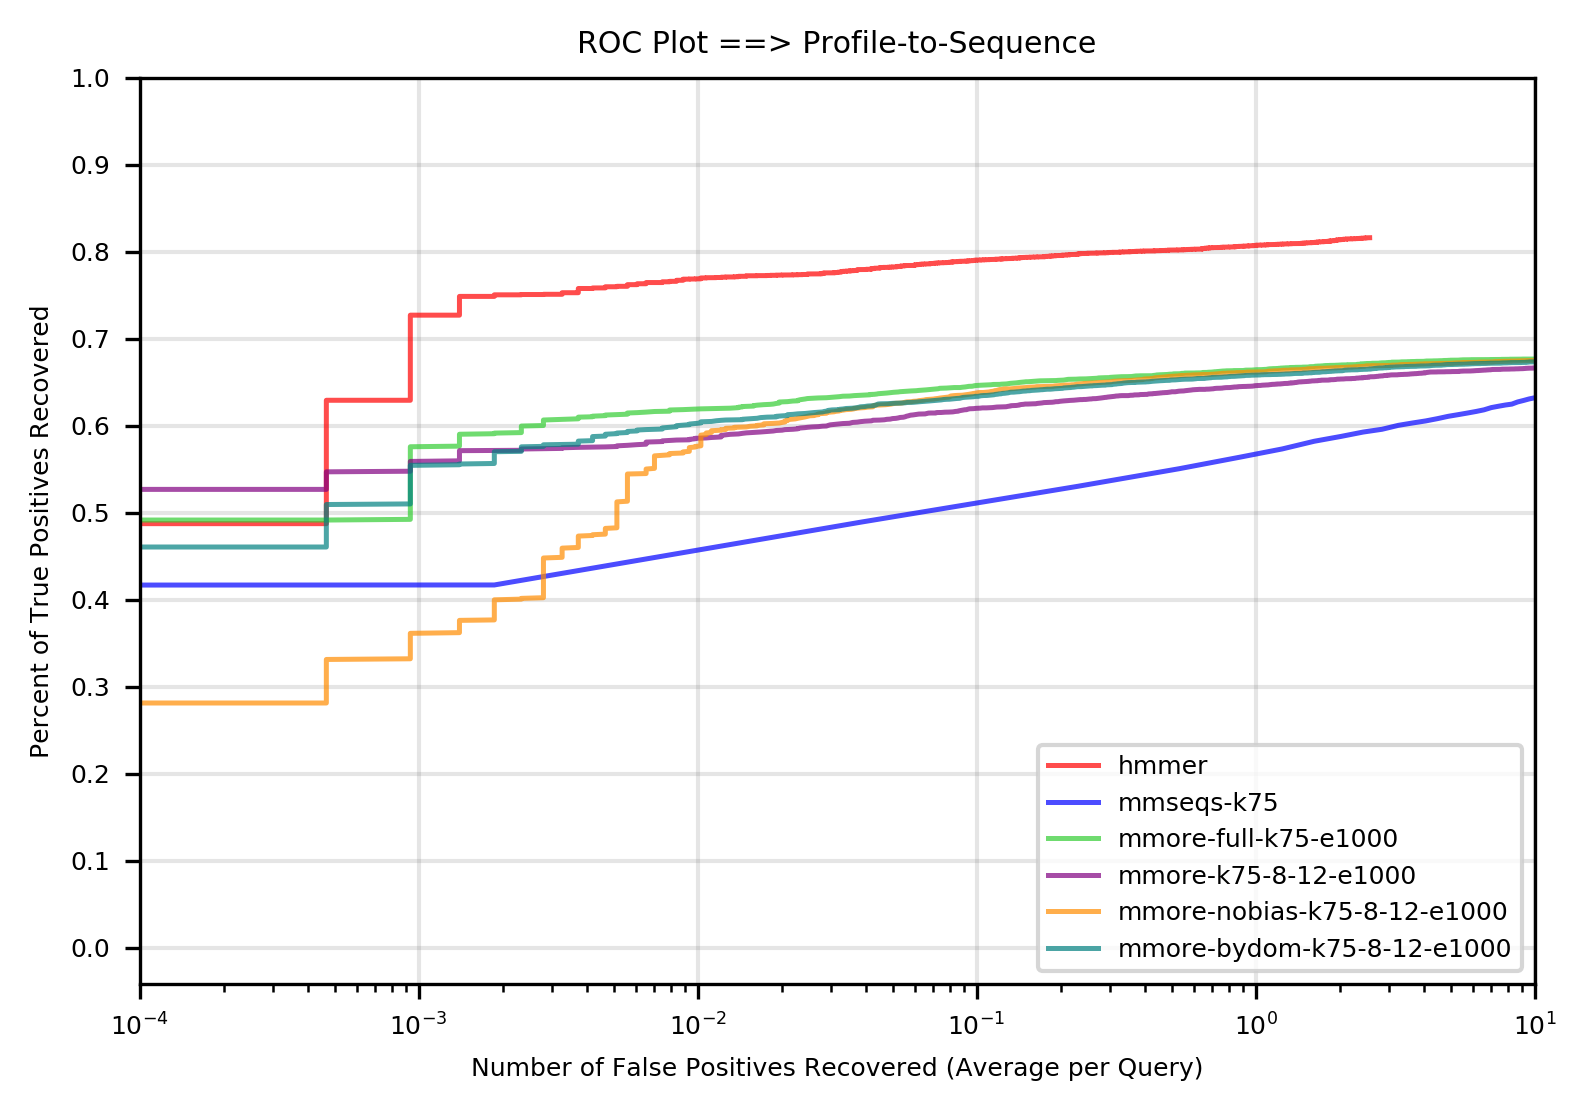

In [182]:
my_data = []
my_colors = []
my_labels = []

i = 0
K = my_kscores[i]
A = my_alphas[0]
B = my_betas[0]
E = my_evals[0]

my_data.append( hmmer["data"] )
my_colors.append( "red" )
my_labels.append( hmmer["label"] )
    
my_data.append( mmseqs[K]["data"] )
my_colors.append( "blue" )
my_labels.append( mmseqs[K]["label"] )

my_data.append( mmore_full[K][E]["data"] )
my_colors.append( "limegreen" )
my_labels.append( mmore_full[K][E]["label"] )

for Ai in mmore["A"]:
    for Bi in mmore["B"]:
        my_data.append( mmore[K][Ai][Bi][E]["data"] )
        my_colors.append( "purple" )
        my_labels.append( mmore[K][Ai][Bi][E]["label"] )

for Ai in mmore["A"]:
    for Bi in mmore["B"]:
        my_data.append( mmore_nobias[K][Ai][Bi][E]["data"] )
        my_colors.append( "darkorange" )
        my_labels.append( mmore_nobias[K][Ai][Bi][E]["label"] )

for Ai in mmore["A"]:
    for Bi in mmore["B"]:
        my_data.append( mmore_bydom[K][Ai][Bi][E]["data"] )
        my_colors.append( "teal" )
        my_labels.append( mmore_bydom[K][Ai][Bi][E]["label"] )

for x in range(len(my_data)):
#     my_colors[x] = cmap.rainbow(x*100)
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=my_colors[x], label=my_labels[x], linestyle="-", linewidth=1.2, marker=None, alpha=0.7 )

plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
plt.yticks(yticks)
plt.xlim((10e-5, 10e0))

plt.title('ROC Plot ==> Profile-to-Sequence')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot-k75.svg")
plt.show()

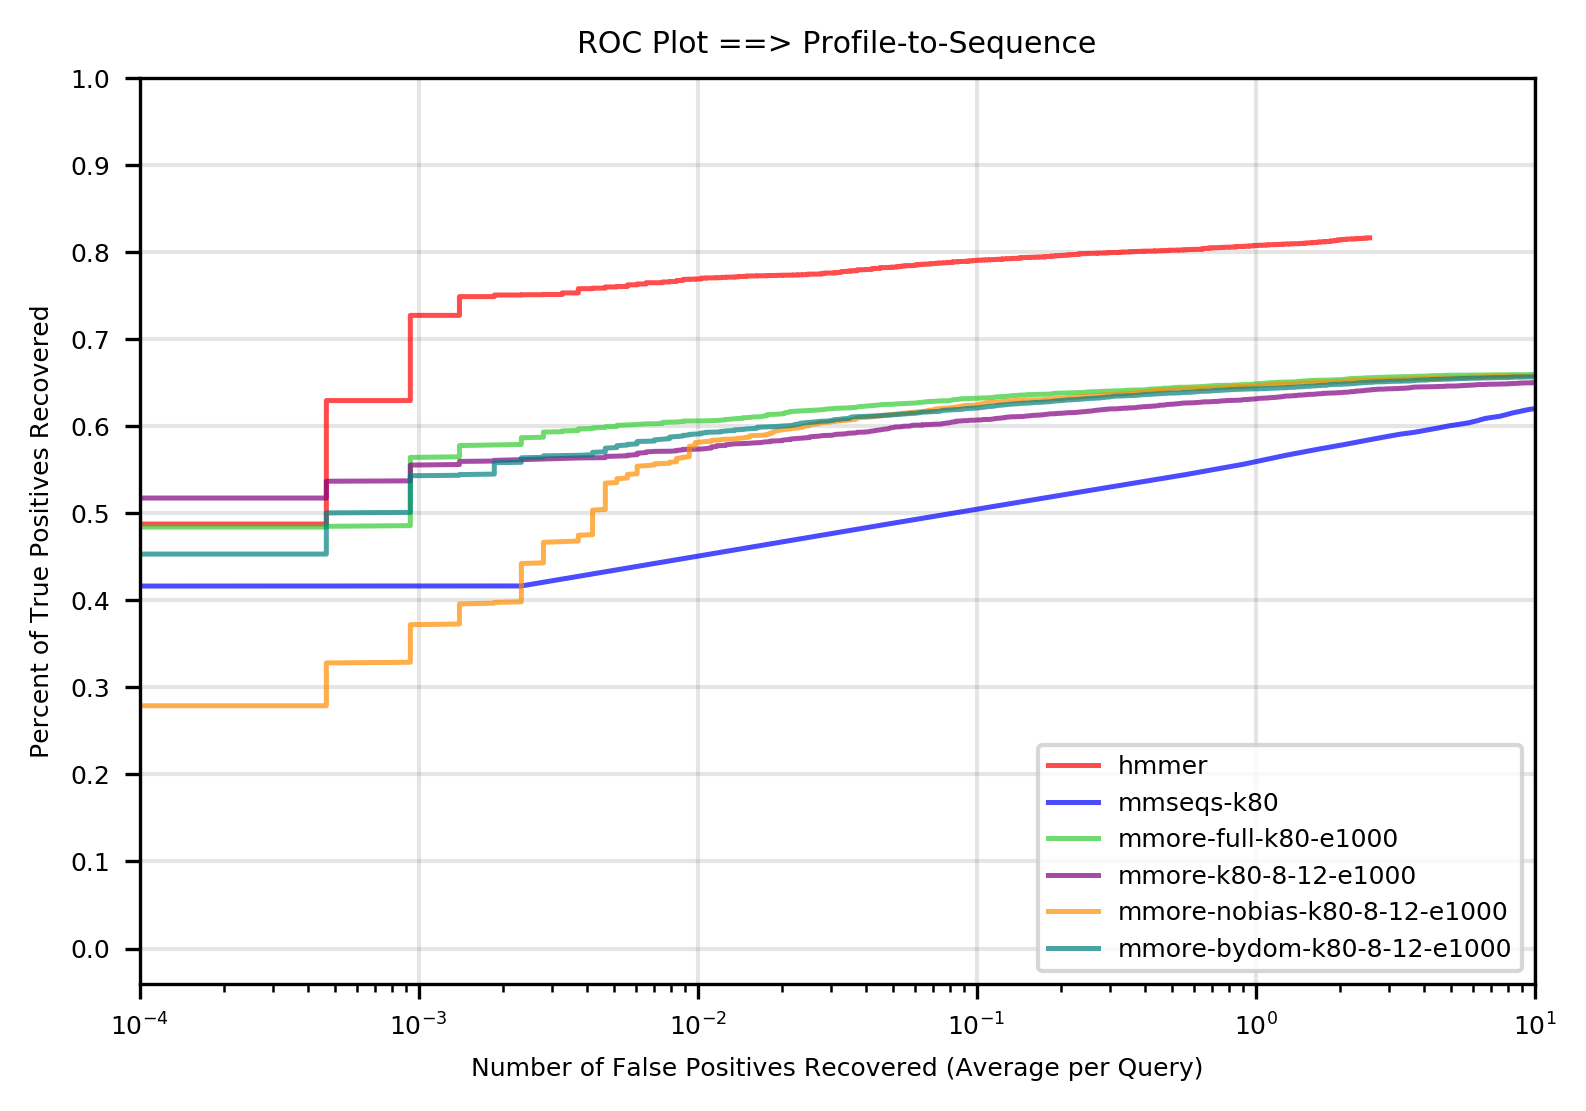

In [183]:
my_data = []
my_colors = []
my_labels = []

i = 1
K = my_kscores[i]
A = my_alphas[0]
B = my_betas[0]
E = my_evals[0]

my_data.append( hmmer["data"] )
my_colors.append( "red" )
my_labels.append( hmmer["label"] )
    
my_data.append( mmseqs[K]["data"] )
my_colors.append( "blue" )
my_labels.append( mmseqs[K]["label"] )

my_data.append( mmore_full[K][E]["data"] )
my_colors.append( "limegreen" )
my_labels.append( mmore_full[K][E]["label"] )

for Ai in mmore["A"]:
    for Bi in mmore["B"]:
        my_data.append( mmore[K][Ai][Bi][E]["data"] )
        my_colors.append( "purple" )
        my_labels.append( mmore[K][Ai][Bi][E]["label"] )

for Ai in mmore["A"]:
    for Bi in mmore["B"]:
        my_data.append( mmore_nobias[K][Ai][Bi][E]["data"] )
        my_colors.append( "darkorange" )
        my_labels.append( mmore_nobias[K][Ai][Bi][E]["label"] )

for Ai in mmore["A"]:
    for Bi in mmore["B"]:
        my_data.append( mmore_bydom[K][Ai][Bi][E]["data"] )
        my_colors.append( "teal" )
        my_labels.append( mmore_bydom[K][Ai][Bi][E]["label"] )

for x in range(len(my_data)):
#     my_colors[x] = cmap.rainbow(x*100)
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=my_colors[x], label=my_labels[x], linestyle="-", linewidth=1.2, marker=None, alpha=0.7 )

plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
plt.yticks(yticks)
plt.xlim((10e-5, 10e0))

plt.title('ROC Plot ==> Profile-to-Sequence')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot-k75.svg")
plt.show()

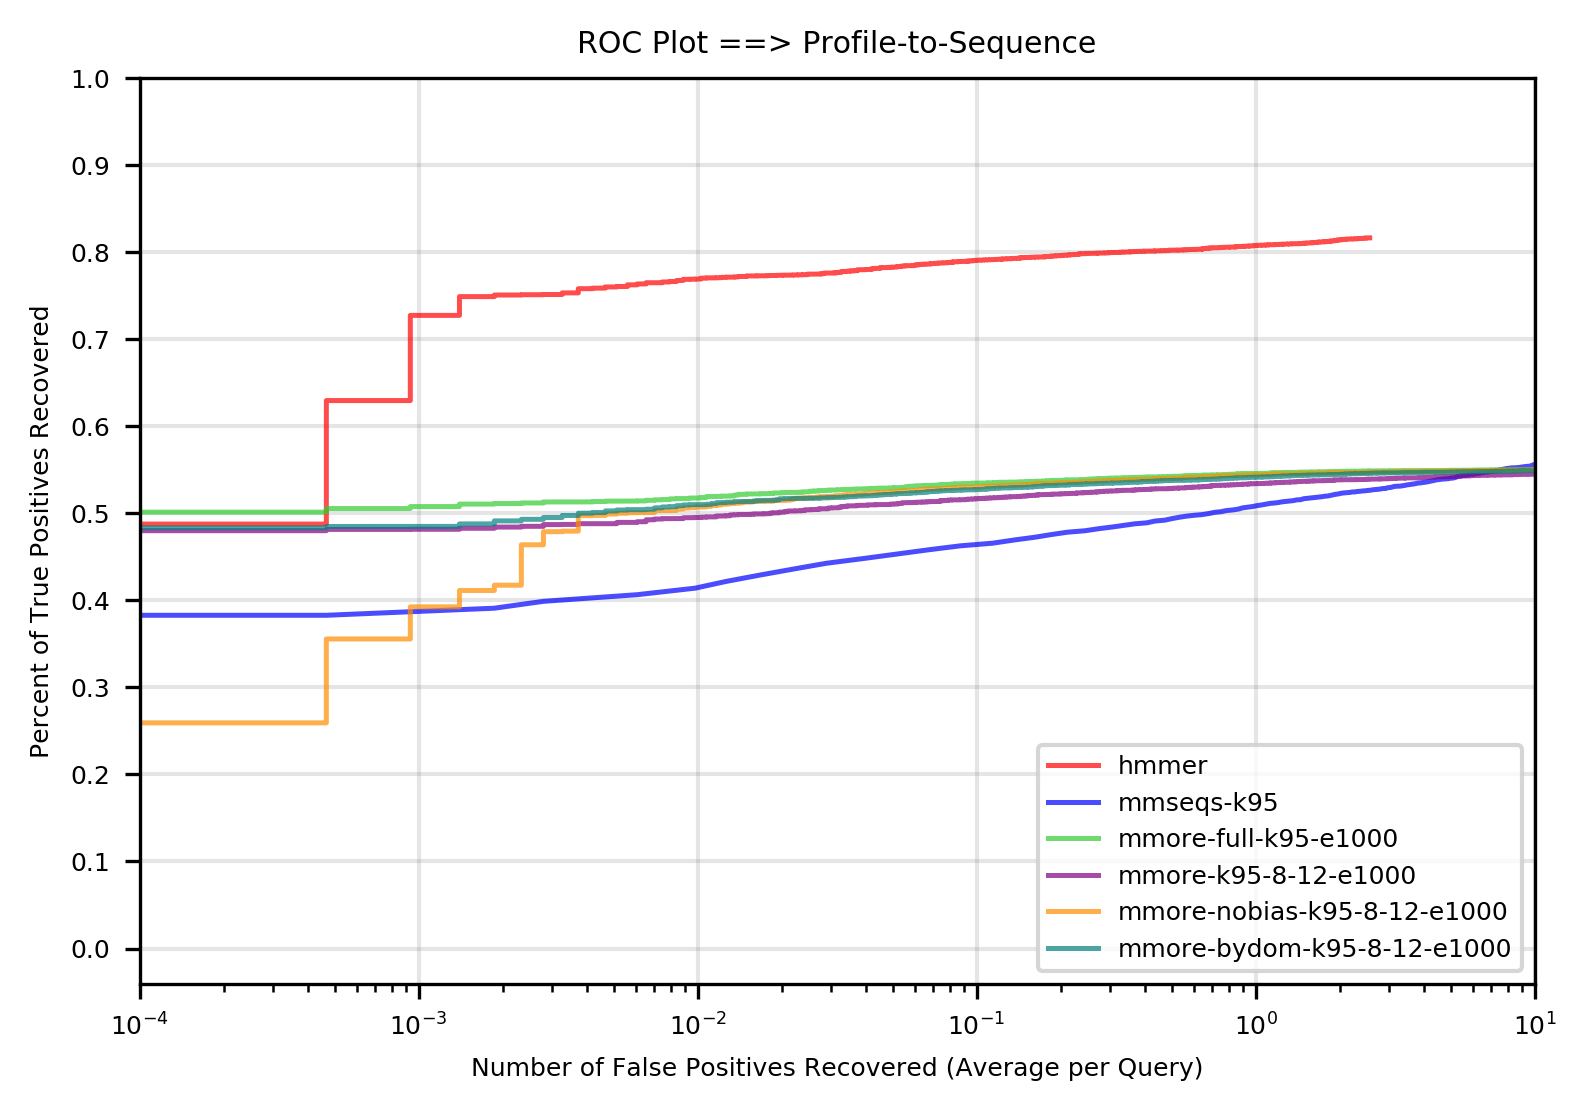

In [184]:
my_data = []
my_colors = []
my_labels = []

i = 2
K = my_kscores[i]
A = my_alphas[0]
B = my_betas[0]
E = my_evals[0]

my_data.append( hmmer["data"] )
my_colors.append( "red" )
my_labels.append( hmmer["label"] )
    
my_data.append( mmseqs[K]["data"] )
my_colors.append( "blue" )
my_labels.append( mmseqs[K]["label"] )

my_data.append( mmore_full[K][E]["data"] )
my_colors.append( "limegreen" )
my_labels.append( mmore_full[K][E]["label"] )

for Ai in mmore["A"]:
    for Bi in mmore["B"]:
        my_data.append( mmore[K][Ai][Bi][E]["data"] )
        my_colors.append( "purple" )
        my_labels.append( mmore[K][Ai][Bi][E]["label"] )

for Ai in mmore["A"]:
    for Bi in mmore["B"]:
        my_data.append( mmore_nobias[K][Ai][Bi][E]["data"] )
        my_colors.append( "darkorange" )
        my_labels.append( mmore_nobias[K][Ai][Bi][E]["label"] )

for Ai in mmore["A"]:
    for Bi in mmore["B"]:
        my_data.append( mmore_bydom[K][Ai][Bi][E]["data"] )
        my_colors.append( "teal" )
        my_labels.append( mmore_bydom[K][Ai][Bi][E]["label"] )

for x in range(len(my_data)):
#     my_colors[x] = cmap.rainbow(x*100)
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=my_colors[x], label=my_labels[x], linestyle="-", linewidth=1.2, marker=None, alpha=0.7 )

plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
plt.yticks(yticks)
plt.xlim((10e-5, 10e0))

plt.title('ROC Plot ==> Profile-to-Sequence')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot-k75.svg")
plt.show()